In [141]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    r2_score,
    roc_auc_score, 
    roc_curve, 
    auc,
    RocCurveDisplay
)
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')



In [23]:

data = pd.read_csv("new_data_with_count.csv")
data.dropna()
data.rename(columns={'Gross.National.Income.GNI..in.USD': 'gross_national_income_GNI', 'Military.expenditure....of.GDP.': 'military_expenditure','Gross.Domestic.Product..GDP.': 'GDP'}, inplace=True)
valid_ideologies = ["leftist", "rightist", "centrist"]

data= data[data["leader_ideology"].isin(valid_ideologies)]
data= data[data["hog_ideology"].isin(valid_ideologies)]
# Ensure democracy is binary (convert 'yes'/'no' to 1/0 if needed)
data.columns = data.columns.str.replace('.', '_', regex=False)


print(data.head())
data.dropna()


   Unnamed: 0  Country  Year hog_ideology leader_ideology match_hog_leader  \
0           1  Albania  1990      leftist         leftist              yes   
1           2  Albania  1996     rightist        rightist               no   
2           3  Albania  1997      leftist         leftist              yes   
3           4  Albania  1998      leftist         leftist              yes   
4           5  Albania  1999      leftist         leftist              yes   

  democracy                           region  IMF_based_exchange_rate  \
0        no  Eastern Europe and Central Asia                 7.745833   
1        no  Eastern Europe and Central Asia               104.498917   
2        no  Eastern Europe and Central Asia               148.932917   
3        no  Eastern Europe and Central Asia               150.633333   
4        no  Eastern Europe and Central Asia               137.690583   

   Population  ... Gross_capital_formation  Imports_of_goods_and_services  \
0   3295066.0  

,Unnamed: 0,Country,Year,hog_ideology,leader_ideology,match_hog_leader,democracy,region,IMF_based_exchange_rate,Population,...,Gross_capital_formation,Imports_of_goods_and_services,mining_manifacturing_isic,transport_storage_communication_isic,wholesale_trade_restaurant_hotel_isic,gross_national_income_GNI,GDP,military_expenditure,Urban_population,Rural_population
0,1,Albania,1990,leftist,leftist,yes,no,Eastern Europe and Central Asia,7.745833,3295066.0,...,5.431669e+08,4.828841e+08,8.631767e+08,2.985798e+07,1.391204e+08,2.143811e+09,2.145751e+09,5.888301,1197222.0,2089320.0
1,2,Albania,1996,rightist,rightist,no,no,Eastern Europe and Central Asia,104.498917,3271331.0,...,4.509509e+08,1.158532e+09,3.280966e+08,1.143496e+08,6.252993e+08,3.271327e+09,3.199642e+09,1.379030,1250518.0,1917515.0
2,3,Albania,1997,leftist,leftist,yes,no,Eastern Europe and Central Asia,148.932917,3253719.0,...,3.795503e+08,8.673393e+08,2.076360e+08,1.021116e+08,4.391012e+08,2.274234e+09,2.224654e+09,1.283081,1260414.0,1887867.0
3,4,Albania,1998,leftist,leftist,yes,no,Eastern Europe and Central Asia,150.633333,3232175.0,...,5.591266e+08,1.026883e+09,2.091365e+08,1.432659e+08,4.976294e+08,2.631658e+09,2.554869e+09,1.238243,1270214.0,1858316.0
4,5,Albania,1999,leftist,leftist,yes,no,Eastern Europe and Central Asia,137.690583,3208260.0,...,7.829524e+08,1.204031e+09,2.561817e+08,1.987122e+08,6.829865e+08,3.297165e+09,3.221670e+09,1.249210,1279853.0,1828925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2950,Zimbabwe,2016,leftist,leftist,yes,no,Sub-Saharan Africa,1.000000,14452704.0,...,2.026381e+09,6.426700e+09,4.102626e+09,2.091819e+09,4.128620e+09,1.877295e+10,2.054868e+10,1.741985,4715311.0,9884983.0
2950,2951,Zimbabwe,2017,leftist,leftist,yes,no,Sub-Saharan Africa,1.000000,14751101.0,...,3.240458e+09,6.693807e+09,6.637330e+09,2.250543e+09,4.421973e+09,2.118140e+10,2.204065e+10,1.592340,4775100.0,10037382.0
2951,2952,Zimbabwe,2018,leftist,leftist,yes,no,Sub-Saharan Africa,1.000000,15052184.0,...,3.345405e+09,6.712015e+09,6.870555e+09,2.492558e+09,4.772648e+09,2.315156e+10,2.364527e+10,1.137810,4842447.0,10192005.0
2952,2953,Zimbabwe,2019,leftist,leftist,yes,no,Sub-Saharan Africa,1.000000,15354608.0,...,3.117897e+09,5.767050e+09,6.623454e+09,1.680270e+09,5.008252e+09,2.223810e+10,2.259452e+10,0.729567,4918908.0,10352460.0


We see that min year is 1990 and max is 2020 so this confirms our filter. Mean military expenditure is aroung 2 percent of GDP, In the dataset urban and rural population counts seem to be balanced. Mean GDP is 4753213e+11. Compared to other sectors, wholesale seems to be the one with the highest USD output. SD is high in construction outputs.

Visualizing correlations helps us see how variables relate:

In [21]:
df_log.columns

Index(['Unnamed: 0', 'Country', 'Year', 'hog_ideology', 'leader_ideology',
       'match_hog_leader', 'democracy', 'region', 'IMF_based_exchange_rate',
       'Population', 'Currency', 'Per_capita_GNI',
       'agriculture_and_hunting_fishing_isic', 'Changes_in_inventories',
       'construction_isic', 'Exports_of_goods_and_services',
       'Gross_capital_formation', 'Imports_of_goods_and_services',
       'mining_manifacturing_isic', 'transport_storage_communication_isic',
       'wholesale_trade_restaurant_hotel_isic', 'gross_national_income_GNI',
       'GDP', 'military_expenditure', 'Urban_population', 'Rural_population'],
      dtype='object')

In [26]:
features = ['IMF_based_exchange_rate', 'Per_capita_GNI', 'agriculture_and_hunting_fishing_isic', 'Changes_in_inventories', 'construction_isic', 'Exports_of_goods_and_services', 'Gross_capital_formation', 'Imports_of_goods_and_services', 'mining_manifacturing_isic', 'transport_storage_communication_isic', 'wholesale_trade_restaurant_hotel_isic', 'gross_national_income_GNI', 'GDP', 'military_expenditure', 'Urban_population', 'Rural_population']

X = data[features]
y = data['leader_ideology']


selected_cols = ['IMF_based_exchange_rate','Per_capita_GNI', 'agriculture_and_hunting_fishing_isic', 'construction_isic', 'Exports_of_goods_and_services', 'Gross_capital_formation', 'Imports_of_goods_and_services', 'mining_manifacturing_isic', 'transport_storage_communication_isic', 'wholesale_trade_restaurant_hotel_isic', 'gross_national_income_GNI', 'GDP', 'military_expenditure', 'Urban_population', 'Rural_population']

# Apply log transform
df_log = data.copy()

df_log[selected_cols] = np.log1p(df_log[selected_cols])  # or np.log1p() if values may be zero

columns_to_work_with = [
    'Per_capita_GNI',
    'agriculture_and_hunting_fishing_isic',
    'construction_isic',
    'Imports_of_goods_and_services',
    'mining_manifacturing_isic',
    'transport_storage_communication_isic',
    'GDP',
    'Urban_population',
    'leader_ideology',
    'democracy',
    'military_expenditure'
]
df_log = df_log[columns_to_work_with]


## 5. Building Predictive Models
### 5.1 Linear Models

*   log\_population (size of country),
    
*   log\_percap\_gni (economic development level),
    
*   GDP shares of government consumption, investment, agriculture, exports, and imports,
    
*   military_spending.


We'll select features and target variable to predict political ideology:

In [ ]:
# Encode target variable REVISION
#le = LabelEncoder()
#y_encoded = le.fit_transform(y)


In [ ]:
# Standardize features REVISION
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [15]:
#print(merged.columns)
df_log['leader_ideology'] = df_log['leader_ideology'].astype('category')
print(df_log['Urban_population'] )
df_log.describe()

0       13.995515
1       14.039069
2       14.046952
3       14.054697
4       14.062257
          ...    
2949    15.366326
2950    15.378926
2951    15.392931
2952    15.408597
2953    15.426184
Name: Urban_population, Length: 2907, dtype: float64


,Unnamed: 0,Year,IMF_based_exchange_rate,Population,Per_capita_GNI,agriculture_and_hunting_fishing_isic,Changes_in_inventories,construction_isic,Exports_of_goods_and_services,Gross_capital_formation,Imports_of_goods_and_services,mining_manifacturing_isic,transport_storage_communication_isic,wholesale_trade_restaurant_hotel_isic,gross_national_income_GNI,GDP,military_expenditure,Urban_population,Rural_population
count,2907.000000,2907.000000,2.907000e+03,2.907000e+03,2907.000000,2907.000000,2.907000e+03,2907.000000,2907.000000,2906.000000,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000,2850.000000,2850.000000
mean,1475.927761,2005.417613,2.873732e+00,4.878521e+07,8.305029,21.884341,2.745778e+09,21.596581,23.456575,23.112808,23.611901,23.013356,22.053152,22.616685,24.598248,24.622855,0.978020,15.625173,15.100129
std,856.864902,8.776788,2.402169e+00,1.616460e+08,1.590030,1.760369,1.320264e+10,2.288962,2.205941,2.214052,2.017409,2.233749,2.256232,2.166506,2.146490,2.146125,0.398946,1.575860,2.321773
min,1.000000,1990.000000,2.990000e-08,3.653920e+05,4.543295,16.373707,-1.510000e+11,14.000905,17.266548,16.630189,17.922623,17.056585,16.297405,16.711084,18.838543,18.922174,0.016171,12.271977,0.000000
25%,730.500000,1998.000000,6.931472e-01,4.516300e+06,7.032624,20.746148,1.471190e+07,19.912635,21.898618,21.514193,22.113980,21.284411,20.381235,21.037944,22.982382,23.025552,0.718779,14.552580,14.054043
50%,1473.000000,2006.000000,2.009514e+00,1.045616e+07,8.252967,21.856542,2.915697e+08,21.451879,23.314762,22.930062,23.377696,22.872636,21.958474,22.390494,24.377617,24.415274,0.922722,15.390023,15.225273
75%,2220.500000,2013.000000,4.630512e+00,2.957408e+07,9.673414,23.004842,1.512241e+09,23.228185,25.135875,24.713918,25.124935,24.683323,23.704854,24.175114,26.189212,26.203905,1.208371,16.635494,16.298282
max,2954.000000,2020.000000,9.587626e+00,1.424930e+09,11.552050,27.796536,2.110000e+11,27.679811,28.631653,29.482621,28.772054,29.146148,28.441951,28.768854,30.712931,30.694412,3.902321,20.580331,20.631961


In [ ]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

Now, split our data:

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### 5.2 GLM Models





### 5.2.1 Binomial Model

Response variable - democracy, start with all features as predictors

In [43]:
from statsmodels.formula.api import glm

import statsmodels.api as sm

In [53]:
df_log_new = df_log.copy().dropna()

***MLP Classifier must deal with the dataset of numeric types.   
So let's update new dataframe, where for real value of string(object) type, we'll set a numeric equivalent for all the columns we use***

In [54]:
df_log.dtypes

Per_capita_GNI                          float64
agriculture_and_hunting_fishing_isic    float64
construction_isic                       float64
Imports_of_goods_and_services           float64
mining_manifacturing_isic               float64
transport_storage_communication_isic    float64
GDP                                     float64
Urban_population                        float64
leader_ideology                          object
democracy                                object
military_expenditure                    float64
dtype: object

In [55]:
column_mapper_dict = {}
for column in df_log.columns:
    if df_log[column].dtype == 'object':
        unique_vals = df_log[column].unique()
        column_mapper_dict[column] = {val: i for i, val in enumerate(unique_vals)}
        
        df_log_new[column] = df_log_new[column].map(column_mapper_dict[column])
        

In [56]:
column_mapper_dict

{'leader_ideology': {'leftist': 0, 'rightist': 1, 'centrist': 2},
 'democracy': {'no': 0, 'yes': 1, nan: 2}}

In [57]:
df_log_new.head()

,Per_capita_GNI,agriculture_and_hunting_fishing_isic,construction_isic,Imports_of_goods_and_services,mining_manifacturing_isic,transport_storage_communication_isic,GDP,Urban_population,leader_ideology,democracy,military_expenditure
0,6.480045,20.611193,19.143951,19.995287,20.576130,17.211963,21.486756,13.995515,0,0,1.929824
1,6.908755,20.875997,19.243972,20.870420,19.608819,18.554771,21.886305,14.039069,1,0,0.866693
2,6.551080,20.369060,19.089738,20.580941,19.151297,18.441577,21.522867,14.046952,0,0,0.825526
3,6.703188,20.415971,19.024759,20.749794,19.158498,18.780213,21.661267,14.054697,0,0,0.805691
4,6.936343,20.542967,19.437968,20.908941,19.361398,19.107368,21.893166,14.062257,0,0,0.810579


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_log_new.drop('democracy',axis=1), df_log_new['democracy'],
    test_size=0.2, random_state=1
)

In [59]:
predictors = '+'.join([col for col in X_train.columns])

binomial_gam = glm(
    f'democracy ~ {predictors}', 
    data=df_log_new.loc[X_train.index],
    family=sm.families.Binomial(),
)


In [60]:
binomial_gam_res = binomial_gam.fit()

In [61]:
binomial_gam_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              democracy   No. Observations:                 2280
Model:                            GLM   Df Residuals:                     2269
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -989.19
Date:                Thu, 15 May 2025   Deviance:                       1978.4
Time:                        23:38:56   Pearson chi2:                 1.88e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3283
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -6.5182      1.297     -5.025      0.000      -9.061      -3.976
Per_capita_GNI                           1.9445      0.157     12.375      0.000       1.637       2.253
agriculture_and_hunting_fishing_isic     0.0892      0.101      0.888      0.375      -0.108       0.286
construction_isic                       -0.1283      0.117     -1.100      0.271      -0.357       0.100
Imports_of_goods_and_services           -0.6537      0.146     -4.474      0.000      -0.940      -0.367
mining_manifacturing_isic               -1.1628      0.163     -7.144      0.000      -1.482      -0.844
transport_storage_communication_isic    -0.6782      0.173     -3.916      0.000      -1.018      -0.339
GDP                                      1.5392      0.357      4.306      0.000       0.839       2.240
Urban_population                         0.8279      0.172      4.818      0.000       0.491       1.165
leader_ideology                          0.1510      0.088      1.708      0.088      -0.022       0.324
military_expenditure                    -1.4829      0.151     -9.801      0.000      -1.779      -1.186
========================================================================================================
"""

In [62]:
y_pred_probes = binomial_gam_res.predict(X_test)

In [63]:
y_pred = (y_pred_probes >= 0.5).astype(int)

In [66]:
cm = confusion_matrix(Y_test, y_pred)

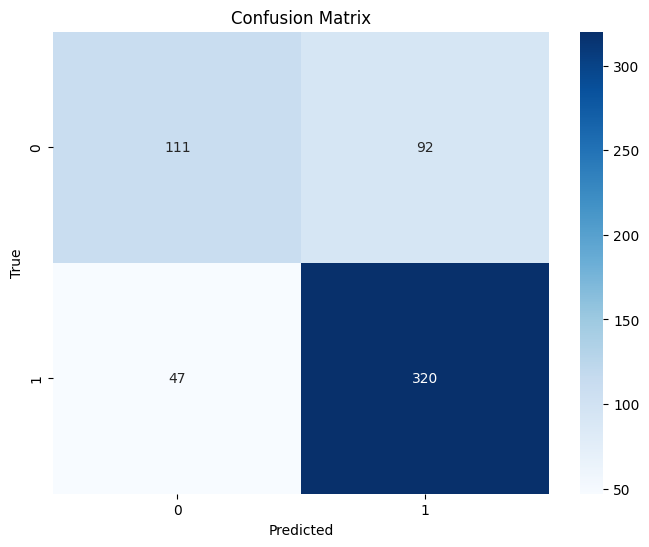

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [68]:
accuracy_score(Y_test, y_pred)

0.756140350877193

In [69]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.55      0.61       203
           1       0.78      0.87      0.82       367

    accuracy                           0.76       570
   macro avg       0.74      0.71      0.72       570
weighted avg       0.75      0.76      0.75       570



***Let's drop couple of features which are not significant, and few which can potentially cause collinearity, 
and build an updated model***

In [70]:
non_significant_columns_per_p = ['agriculture_and_hunting_fishing_isic', 'construction_isic', 'leader_ideology']
X_reduce_train = X_train.drop(columns=non_significant_columns_per_p)
predictors = '+'.join([col for col in X_reduce_train.columns])

binomial_gam = glm(
    f'democracy ~ {predictors}', 
    data=df_log_new.drop(columns=non_significant_columns_per_p).loc[X_reduce_train.index],
    family=sm.families.Binomial(),
)


In [71]:
binomial_gam_res = binomial_gam.fit()

In [72]:
binomial_gam_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              democracy   No. Observations:                 2280
Model:                            GLM   Df Residuals:                     2272
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -991.66
Date:                Thu, 15 May 2025   Deviance:                       1983.3
Time:                        23:41:54   Pearson chi2:                 1.89e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3268
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -5.8244      1.172     -4.970      0.000      -8.121      -3.527
Per_capita_GNI                           1.8867      0.142     13.301      0.000       1.609       2.165
Imports_of_goods_and_services           -0.7186      0.141     -5.108      0.000      -0.994      -0.443
mining_manifacturing_isic               -1.1665      0.161     -7.260      0.000      -1.481      -0.852
transport_storage_communication_isic    -0.7012      0.171     -4.102      0.000      -1.036      -0.366
GDP                                      1.5883      0.284      5.590      0.000       1.031       2.145
Urban_population                         0.8286      0.171      4.842      0.000       0.493       1.164
military_expenditure                    -1.5206      0.147    -10.344      0.000      -1.809      -1.232
========================================================================================================
"""

In [73]:
np.exp(binomial_gam_res.params['Per_capita_GNI'])

6.597377678943481

In [74]:
np.exp(binomial_gam_res.params['military_expenditure'])

0.2185888723285314

***
***Model interpretation***  

Statistically-wise, we see a better features chosen, as all of them are significant now.  
Pseudo R-squ. (CS) parameter tells us, that almost 33% of the variation are explained by the model.   
We can interpret coefficients of our model.  
For binary / binomial models to interpret coefficients properly, 
we need to get an exponential form of each coefficient, because by default, the activation function is logarithmic, 
and we need to take inverse of it.  

Let's start from the largest coefficient - Per_capita_GNI feature.  
A one-unit increase in this feature, leads to 6.6 times increase in an odds ratio for entry to be democratic,  
once other features are constant.  
An opposite example - military_expenditure feature.  
A one-unit increase leads to 21% decrease in an odds ratio for entry to be democratic.  
Here we can stop interpreting coefficients, as it will be the same explanation.  
To have a general look on features coefficients and there affect, I'll build a related plot below
***

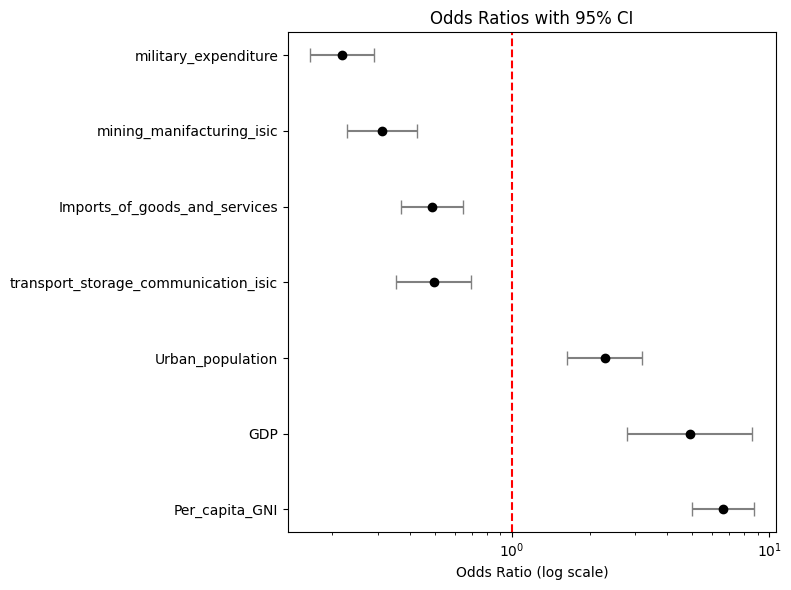

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get coefficients and confidence intervals
coefs = binomial_gam_res.params.drop(['Intercept'])
conf = binomial_gam_res.conf_int().drop(['Intercept'])
conf.columns = ['2.5%', '97.5%']

# Compute odds ratios and CI
odds_ratios = np.exp(coefs)
conf_exp = np.exp(conf)

# Create a DataFrame
or_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    '2.5%': conf_exp['2.5%'],
    '97.5%': conf_exp['97.5%']
}).sort_values(by='Odds Ratio', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(or_df['Odds Ratio'], or_df.index, 
             xerr=[or_df['Odds Ratio'] - or_df['2.5%'], 
                   or_df['97.5%'] - or_df['Odds Ratio']],
             fmt='o', color='black', ecolor='gray', capsize=5)
plt.axvline(1, color='red', linestyle='--')
plt.xlabel("Odds Ratio (log scale)")
plt.xscale('log')
plt.title("Odds Ratios with 95% CI")
plt.tight_layout()
plt.show()

***Evaluate model performance***

In [78]:
y_pred_probes = binomial_gam_res.predict(X_test.drop(columns=non_significant_columns_per_p))


In [79]:
y_pred = (y_pred_probes >= 0.5).astype(int)

In [80]:
cm = confusion_matrix(Y_test, y_pred)

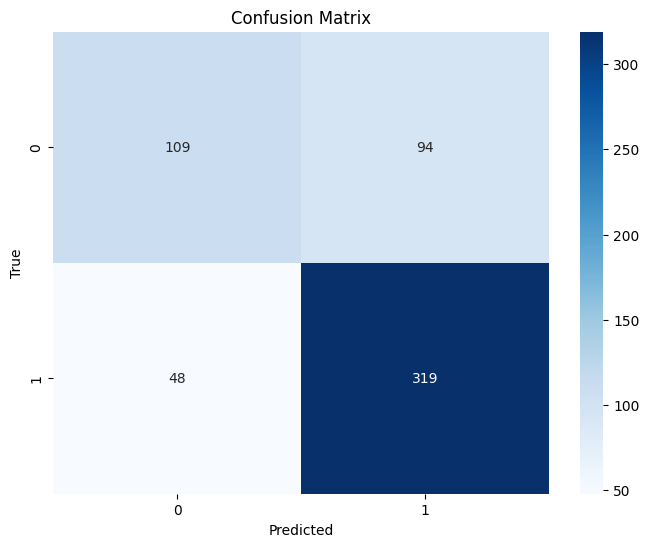

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [82]:
accuracy_score(Y_test, y_pred)

0.7508771929824561

In [83]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.54      0.61       203
           1       0.77      0.87      0.82       367

    accuracy                           0.75       570
   macro avg       0.73      0.70      0.71       570
weighted avg       0.74      0.75      0.74       570



In [97]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auci = auc(fpr, tpr)

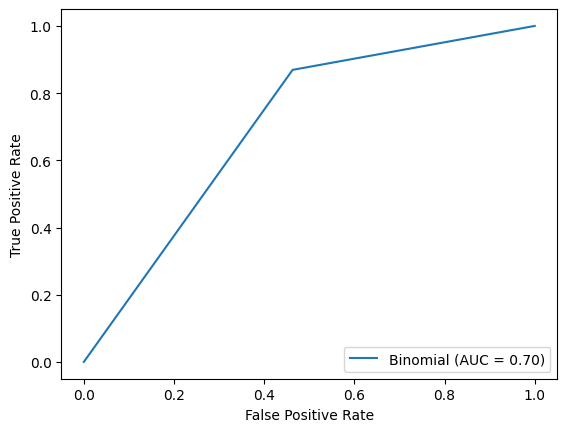

In [98]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auci, estimator_name = 'Binomial')
display.plot()

***From the above results, we have confirmed that the model has quite good performance.  
In term of simplicity of the model and clear understanding of how features influence the response variable, 
it might be a good choice to use, if there's not such a goal to have as high accuracy as possible***

### 5.4 Neural Networks

**Neural Network**:

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from math import sqrt

from sklearn.model_selection import GridSearchCV



#### Classification (multi-label)
##### Predict leader_ideology from the features we have

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_log_new.drop('leader_ideology',axis=1), df_log_new['leader_ideology'],
    test_size=0.2, random_state=1
)

***MLP is very sensitive to feature scaling, so makes sense to scale features in the same way.  
We'll use a common approach in this case - StandardScaler.  
The only one problem which can be here is the case of outliers. They have a very strong negative effect on scaling***

***For the MLP Classifier or Regressor we need to provide some parameters.  
solver - Algorithm for optimization. LBFGS works pretty well with small datasets, so should be good fit in our case.  
alpha - regularization parameter. Helps to fight overfitting and bias.  
Increasing alpha -> smaller weights -> simpler decision boundaries (might improve overfitting effect).  
Decreasing alpha -> bigger weights -> more complex dicison boundaries (might fix high bias -> underfitting)***

***Now, lets build MLP Classifier with different hidden_layer_num parameter from 10 to 1500 with step 100, 
and check, will there be a benefit of using higher hidden_layer_num***

In [104]:
hidden_layer_num_accuracy_dict = {}
for hidden_layer_num in range(10,1500,100):
    pipeline = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", MLPClassifier(
        solver='lbfgs', 
        alpha=1e-5,
        hidden_layer_sizes=(hidden_layer_num,), 
        random_state=1
        )
        )
    ])

    pipeline.fit(X_train, Y_train)

    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    
    hidden_layer_num_accuracy_dict[hidden_layer_num] = accuracy

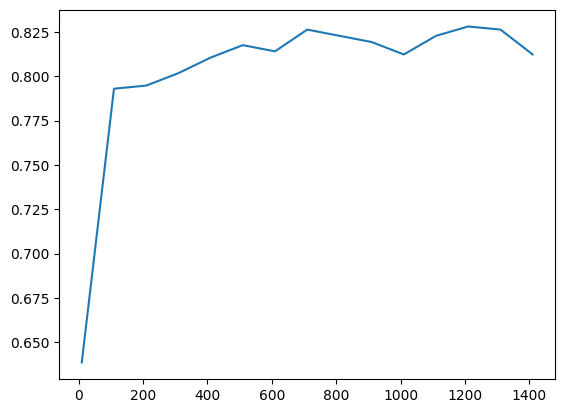

In [105]:
plt.plot(hidden_layer_num_accuracy_dict.keys(), hidden_layer_num_accuracy_dict.values())

***According to the above plot, we can say, that there's no any clear sign, 
that higher hidden_layer_num is better in our concrete case after reaching num_layers=200***

***Next, let's build an MLPClassifier model with some basic configuration, 
train it on a subset of data, predict results and calculate accuracy and other model evaluation criterias***

In [109]:
pipeline = Pipeline(steps=[
("preprocessor", StandardScaler()),
("classifier", MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(200,), 
    random_state=1
    )
    )
])

pipeline.fit(X_train, Y_train)

y_pred = pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")


Accuracy: 0.8175


***The Accuracy looks to be good***

In [110]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84       255
           1       0.83      0.82      0.82       253
           2       0.73      0.69      0.71        62

    accuracy                           0.82       570
   macro avg       0.79      0.79      0.79       570
weighted avg       0.82      0.82      0.82       570



***By checking classification report, the results look very good. Precision and recall have very high values***

In [111]:
cm = confusion_matrix(y_pred, Y_test)

In [112]:
cm

array([[215,  37,   7],
       [ 32, 208,  12],
       [  8,   8,  43]])

In [113]:
import seaborn as sns

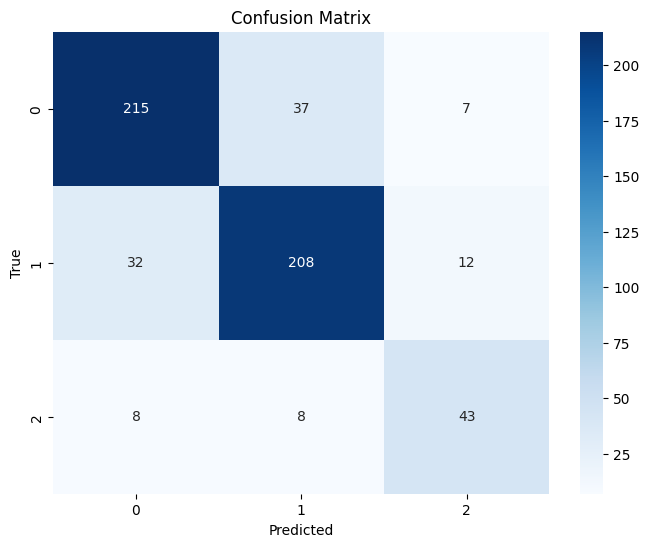

In [114]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

***We have a very high accuracy on predicting ideology from the features we include***

#### Classification (binary)
##### Predict democracy from the features we have

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_log_new.drop('democracy',axis=1), df_log_new['democracy'],
    test_size=0.2, random_state=1
)

In [118]:
pipeline = Pipeline(steps=[
("preprocessor", StandardScaler()),
("regressor", MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(200,), 
    random_state=1
    )
    )
])

pipeline.fit(X_train, Y_train)

y_pred = pipeline.predict(X_test)

In [119]:
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")

Accuracy: 0.9246


In [120]:
cm = confusion_matrix(Y_test, y_pred)

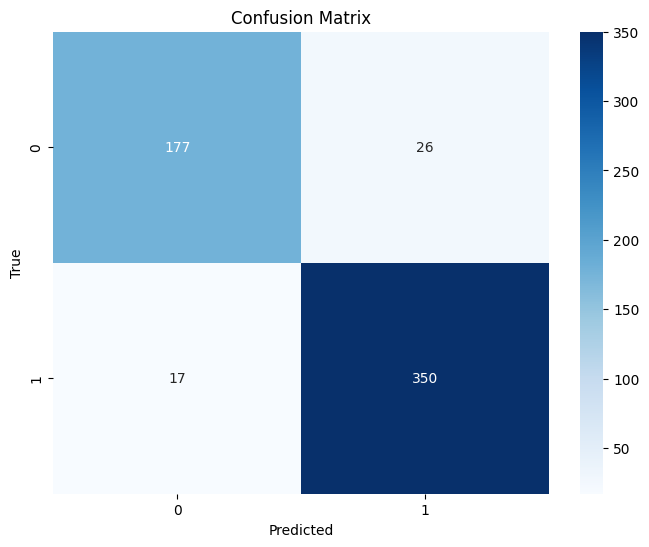

In [121]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [122]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.87      0.89       203
           1       0.93      0.95      0.94       367

    accuracy                           0.92       570
   macro avg       0.92      0.91      0.92       570
weighted avg       0.92      0.92      0.92       570



In [123]:
roc_auc_score(Y_test, y_pred)

0.9127998281902256

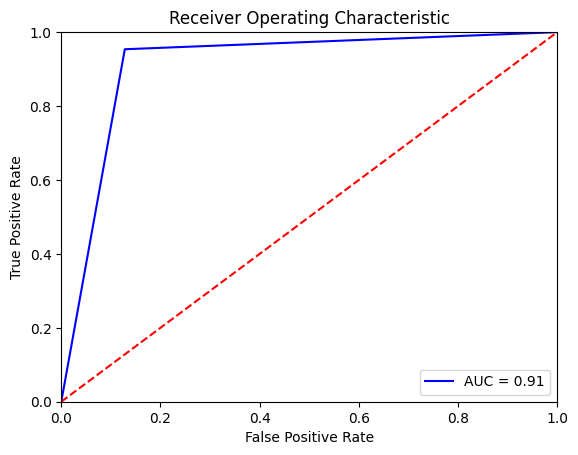

In [124]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr, tpr, threshold = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***By checking Accuracy, classification report, confusion matrix and ROC plot, we can come with a conclusion,
that model actually performs quite well to predict the binomial feature - democracy***

#### Regression
##### Predict military_expenditure from the features we have

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_log_new.drop('military_expenditure',axis=1), df_log_new['military_expenditure'],
    test_size=0.2, random_state=1
)

In [126]:
pipeline = Pipeline(steps=[
("preprocessor", StandardScaler()),
("regressor", MLPRegressor(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(200,), 
    random_state=1
    )
    )
])

pipeline.fit(X_train, Y_train)

y_pred = pipeline.predict(X_test)

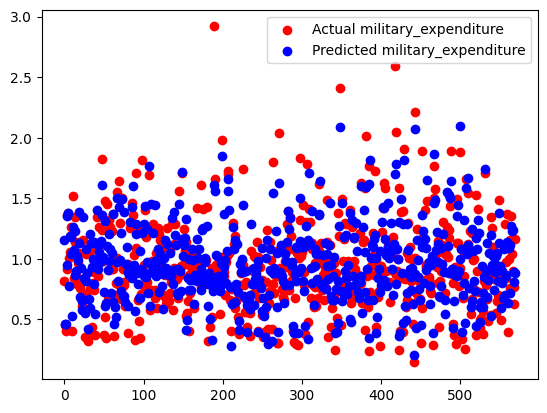

In [127]:
plt.scatter(range(len(Y_test)), Y_test, color='red')
plt.scatter(range(len(Y_test)), y_pred, color='blue')
plt.legend(['Actual military_expenditure', 'Predicted military_expenditure'])

***From the above scatterplot we see how close actual and predicted values are located to each other***

<AxesSubplot:xlabel='military_expenditure', ylabel='Count'>

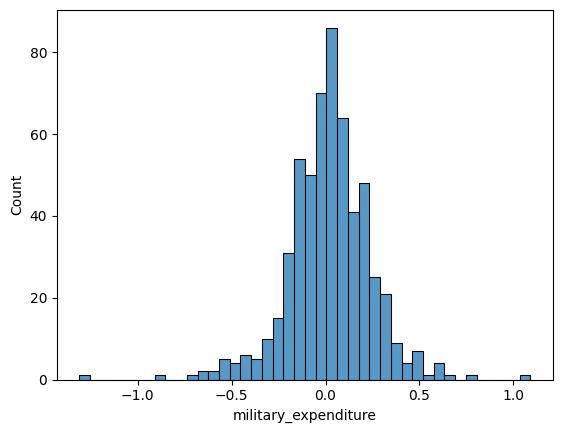

In [128]:
sns.histplot(y_pred - Y_test)

***The residuals are almost normally distributed***

In [129]:
sqrt(mean_squared_error(Y_test, y_pred))

0.22169242151361568

In [130]:
RMSE = sqrt(sum((y_pred - Y_test)**2)/Y_test.shape[0])

In [131]:
print(f"RMSE: {RMSE:.5f}")


RMSE: 0.22169


In [132]:
R2 = 1-sum((Y_test - y_pred)**2)/sum((Y_test - np.mean(Y_test))**2)

In [133]:
print(f"R2: {R2:.5f}")

R2: 0.65849


***As a result, we have a low RMSE, and a relatively good R2 score, showing us that the model predicts acceptable, but we were expecting better results. Looks like this amount of predictors we've chosen is not enough*** 

***Let's execute a Cross-Validation to check, can we find a better model***

In [135]:
param_list = {
    "hidden_layer_sizes": [50,100],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "alpha": [1e-5,1e-4],
    "solver": ["lbfgs", "sgd", "adam"]
}
gridCV = GridSearchCV(estimator=MLPRegressor(), param_grid=param_list)

In [136]:
gridCV.fit(X_train, Y_train)

GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [1e-05, 0.0001],
                         'hidden_layer_sizes': [50, 100],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [137]:
gridCV.best_estimator_

MLPRegressor(activation='tanh', hidden_layer_sizes=100, solver='lbfgs')

In [138]:
best_predict = gridCV.best_estimator_.predict(X_test)

In [139]:
sqrt(mean_squared_error(Y_test, best_predict))

0.3325483843213629

In [142]:
r2_score(Y_test, y_pred)

0.658494593521417

***Based on the results, with the provided parameters, the best estimated model was a bit worse than our custom, standard one***

## 6. Results
We'll use cross-validation to check our models:

## 7. Reflection on Generative AI
We use generative AI to help us write code, clarify methods, brainstorm, and interpret results. It was quick, but we faced several problems, especially when loading our data sets to draw conclusions. One of our data sets includes ideology information, and some generative AI tools are restricted and can't read such data. For example, **DeepSeek** didn't allow us to load the data set for conclusions. We tried **Perplexity AI**, but its conclusions were inaccurate. **Google Gemini** also failed because it couldn't load a CSV database.

So, we mainly used **OpenAI** and **ChatGPT**. With the free version, it is not possible to have full capacity for drawing conclusions from databases, but it helps clarify methods, brainstorm ideas, and understand correlations. Our hypothesis is complex, involving a social experiment comparing economic indicators and military investment to predict political ideologies. Drawing conclusions from such experiments is hard, but it was an interesting experience.


## 8. Conclusions
From our analysis, we've seen that economic indicators can help predict political ideologies, but not perfectly. Features like GDP, income levels, and military spending were important predictors. This analysis gives useful insights into how economics might influence politics globally.
